# Final assignment: Predictive model

## Introduction 

For the course 'Fundamentals of Machine Learning', I thought it would be interesting to predict my Netlix usage based on the weather and time. It would be interesting to see if there is some sort of pattern in my Netflix behavior. For example, when the temperature is high outside, is it more likely that I am going outside and don't watch Netflix on that day? Or if I have upcoming exams, do I reduce or stop my Netflix usage, because I have to prepare for my exams? 
Therefore, my research question is:

<i>Does the weather and time have an influence on my Netflix usage?</i>

The result of this question could be practical for Netflix, because they could predict if I am going to watch Netflix on a certain day. For example, if Netflix would like to advertise or promote a certain serie or movie or if they would like to recommend something, therefore 'timing is key'. For Netflix, it would be relevant to know when I am going to watch Netflix in order to anticipate on my Netflix usage. 

In [1]:
# Importing libraries in order to use the different functionalities later on

# For creating graphs
import seaborn as sns
import matplotlib.pyplot as plt

# For working with dataframes
import pandas as pd

# For the prediction model
import sklearn as sk
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Data set and feature engineering

In order to answer the research question, I used two data sets: the Weather data set and my Netflix data set.

<i>Weather dataset:</i><br>
The Weather data set is acquired from the website "https://wow.knmi.nl/". On this website, it is possible to select a specific weather station, a time frame and a maximum of five variables. In this case, I selected the "Twente" as my weather station and I used the time frame 08/08/2019 until 05/01/2021, because I needed the exact same timeframe as my Netflix data. In order to get the right variables, I had to download the dataframe (csv-file) twice, since it is possible to get a maximum of five variables per dataframe. 

<i>Netflix dataset:</i><br>
The Netflix dataset is acquired from my own Netflix account, which I share with my parents, brother and sister. On this website, you just ask for your personal data and after a few days, you can download your zip-file. The zip-file contains multiple files, but I only used "Content_Interaction > ViewingActivity.csv". 

First, I cleaned the weather data set and I extracted some extra variables from the 'date' column. Then, I cleaned my netflix data set and in the end I merge it together in order to create one complete dataframe. 

### Weather data set 

The weather data set has two sets. 
The first dataset has the variables:
- Date
- Temperature (Quantitative)
- Amount of rain (Quantitative)
- Fastness of wind (Quantitative)
- The wind direction (Quantitative)
- Relative humidity (Quantitative)

The second data set has the variable:
- Air pressure (Quantitative)

At the end, it is the goal to have a dataframe with one date at each row (not multiple rows with the same date) and of course, merged the weather dataframes into one dataframe. First, we imported the data sets and I changed the name of the colums to make it convenient to work with it. 

In [2]:
# Importing the dataset of student and showing the head in order to get an overview of the dataset
weather_data_five_variables = pd.read_csv('weather-data(5).csv', sep=";") 
weather_data_one_variable = pd.read_csv('weather-data(1).csv', sep=";") 

# Change the name of the column into a simpeler name
weather_data_luchtdruk = weather_data_one_variable.rename(columns={'datum' : 'Datum', 'luchtdruk (hPa) [917576001]': 'Luchtdruk'})

# Change the other column names
weather_data_five_other_variables = weather_data_five_variables.rename(columns={'datum' : 'Datum', 'temperatuur (C) [917576001]': 'Temperatuur (G)', 'neerslagintensiteit (mm/uur) [917576001]' : 'Neerslag (mm/uur)', 'windsnelheid (m/s) [917576001]' : 'Windsnelheid (m/s)', 'windrichting (graden) [917576001]' : 'Windrichting (graden)', 'relatieve vochtigheid (%) [917576001]' : 'Relatieve vochtigheid (%)'})
weather_data_five_other_variables = weather_data_five_other_variables.rename(columns={'relatieve vochtigheid  (%) [917576001]' : 'Relatieve vochtigheid (%)'})
weather_data_five_other_variables

,Datum,Temperatuur (G),Neerslag (mm/uur),Windsnelheid (m/s),Windrichting (graden),Relatieve vochtigheid (%)
0,2019-08-08T00:00:00,17.5,0.0,3.6,219,64
1,2019-08-08T00:10:00,16.5,0.0,3.0,198,68
2,2019-08-08T00:20:00,16.7,0.0,3.4,208,68
3,2019-08-08T00:30:00,16.6,0.0,3.0,212,68
4,2019-08-08T00:40:00,16.7,0.0,3.5,212,67
...,...,...,...,...,...,...
74437,2021-01-05T23:10:00,3.2,0.0,4.6,27,94
74438,2021-01-05T23:20:00,3.2,0.0,4.5,26,94
74439,2021-01-05T23:30:00,3.1,0.0,4.7,27,94
74440,2021-01-05T23:40:00,3.1,0.0,5.0,28,94


#### Air pressure variable (Oftewel Luchtdruk variabele)

The 'date' column (Datum) had to be transformed into datetime in order to easily work with it. This means that I will split the date and time and convert it to datetime. Once you print the .info() of the dataframe, it is possible to see the Dtype of a column, this means the type of a certain column. A column needs to be in the right type in order to work with it. In this case, Datum needs to be converted to 'datetime64[ns]'

In [3]:
# Showing the .head() of the dataframe
weather_data_luchtdruk.head()

,Datum,Luchtdruk
0,2019-08-08T00:00:00,1008.4
1,2019-08-08T00:10:00,1008.5
2,2019-08-08T00:20:00,1008.6
3,2019-08-08T00:30:00,1008.6
4,2019-08-08T00:40:00,1008.6


In [4]:
# Split the date and time into two seperate column and convert it to date time
weather_data_luchtdruk['Datum'] = pd.to_datetime(weather_data_luchtdruk['Datum']).dt.date
weather_data_luchtdruk['Tijd'] = pd.to_datetime(weather_data_luchtdruk['Datum']).dt.time
weather_data_luchtdruk['Datum'] = pd.to_datetime(weather_data_luchtdruk['Datum'])
weather_data_luchtdruk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74442 entries, 0 to 74441
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Datum      74442 non-null  datetime64[ns]
 1   Luchtdruk  74442 non-null  object        
 2   Tijd       74442 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


The dataframe has values, but also some '-' values. This means that a value could not be measured on a certain time. In order to remove these values, we had to replace them with a 'NaN', because then it is possible to drop them. The rows need to be dropped, because otherwise there will be huge outliers and that will influence the outcome of the mean. I chose to calculate the mean, because that gave the most relevant outcome. 

In [5]:
# Replace al the '-' with a NaN and drop all the rows
weather_data_luchtdruk['Luchtdruk'] = weather_data_luchtdruk['Luchtdruk'].replace('-', float("NaN"))
weather_data_luchtdruk['Luchtdruk'] = weather_data_luchtdruk['Luchtdruk'].dropna()

# Convert the values from object to an integer in order to sum them and take the mean
weather_data_luchtdruk['Luchtdruk'] = weather_data_luchtdruk['Luchtdruk'].apply(pd.to_numeric)
luchtdruk_data = weather_data_luchtdruk.groupby(weather_data_luchtdruk['Datum']).mean()
luchtdruk_data['Luchtdruk'] = round(luchtdruk_data['Luchtdruk'],1)
luchtdruk_data

,Luchtdruk
Datum,
2019-08-08,1010.3
2019-08-09,1008.5
2019-08-10,1008.3
2019-08-11,1013.5
2019-08-12,1013.9
...,...
2021-01-01,1007.9
2021-01-02,1013.5
2021-01-03,1016.3


#### Amount of rain variable (Oftewel Neerslag variabele)

Then I worked on the second dataframe. First, I start with the 'amount of rain variable', because that column has a different method than the others. In the 'amount of rain' column I will sum all the variables, since I would like to know the total amount of rain on a certain day. For the other columns ('Temperature', 'Fastness of the wind', 'Wind direction' and 'humidity'), I will do the same as I did at the 'air pressure' column. The only difference is that I first removed all the column with a time between 00:00 and 9:00, since it is very unlikely that I watch Netflix during that time frame. 

However I did not delete the time at the air pressure variable, because that is the only variable which value is always around the same amount (it doesn't matter if it is day or night). So therefore, it would be unnecessary to remove the time on a certain day. 

In [6]:
# Split the date and time into two seperate column and convert it to date time
weather_data_five_other_variables['Tijd'] = pd.to_datetime(weather_data_five_other_variables['Datum']).dt.time
weather_data_five_other_variables['Datum'] = pd.to_datetime(weather_data_five_other_variables['Datum']).dt.date
weather_data_five_other_variables['Datum'] = pd.to_datetime(weather_data_five_other_variables['Datum'])
weather_data_five_other_variables

,Datum,Temperatuur (G),Neerslag (mm/uur),Windsnelheid (m/s),Windrichting (graden),Relatieve vochtigheid (%),Tijd
0,2019-08-08,17.5,0.0,3.6,219,64,00:00:00
1,2019-08-08,16.5,0.0,3.0,198,68,00:10:00
2,2019-08-08,16.7,0.0,3.4,208,68,00:20:00
3,2019-08-08,16.6,0.0,3.0,212,68,00:30:00
4,2019-08-08,16.7,0.0,3.5,212,67,00:40:00
...,...,...,...,...,...,...,...
74437,2021-01-05,3.2,0.0,4.6,27,94,23:10:00
74438,2021-01-05,3.2,0.0,4.5,26,94,23:20:00
74439,2021-01-05,3.1,0.0,4.7,27,94,23:30:00
74440,2021-01-05,3.1,0.0,5.0,28,94,23:40:00


In [7]:
# Replace al the '-' with a NaN and drop all the rows
weather_data_five_other_variables['Neerslag (mm/uur)'] = weather_data_five_other_variables['Neerslag (mm/uur)'].replace('-', float("NaN"))
weather_data_five_other_variables['Neerslag (mm/uur)'] = weather_data_five_other_variables['Neerslag (mm/uur)'].dropna()

# Convert the values from object to an integer in order to sum the 'amount of rain' column
weather_data_five_other_variables['Neerslag (mm/uur)'] = weather_data_five_other_variables['Neerslag (mm/uur)'].apply(pd.to_numeric)

# Subset the 'neerslag' variable in order to sum it per day
rain_data = weather_data_five_other_variables[['Datum', 'Neerslag (mm/uur)']]
rain_data = rain_data.groupby(rain_data['Datum']).sum()
rain_data = rain_data.rename(columns={'Neerslag (mm/uur)' : 'Neerslag (mm)'})
rain_data

,Neerslag (mm)
Datum,
2019-08-08,0.0
2019-08-09,32.3
2019-08-10,4.2
2019-08-11,0.0
2019-08-12,46.8
...,...
2021-01-01,0.0
2021-01-02,6.6
2021-01-03,7.4


As I mentioned in an earlier paragraph, for 'temperature', 'fastness of the wind' and 'humidity' I need to take the mean of the values within a specific time frame (everything outside 00:00 - 9:00). Besides, I chose to drop het 'Wind direction' variable, since I think that it has no influence on my netflix usage and it is a bit meaningless, because it is a number.

In [8]:
# Subset the other variab
temperature_and_wind = weather_data_five_other_variables[['Datum', 'Temperatuur (G)', 'Windsnelheid (m/s)', 'Relatieve vochtigheid (%)', 'Tijd']]
temperature_and_wind.head()

,Datum,Temperatuur (G),Windsnelheid (m/s),Relatieve vochtigheid (%),Tijd
0,2019-08-08,17.5,3.6,64,00:00:00
1,2019-08-08,16.5,3.0,68,00:10:00
2,2019-08-08,16.7,3.4,68,00:20:00
3,2019-08-08,16.6,3.0,68,00:30:00
4,2019-08-08,16.7,3.5,67,00:40:00


In [9]:
def change_time_into_number(x):
    current_hour = x.hour
    return current_hour
 
# Change the values of time into hour (a number), because I only need to know if the number is bigger than 8
# in order to remove the rows with the 'wrong' time
# The method (or function) gets the 'hour' value of time and returns the number
temperature_and_wind['Tijd'] = temperature_and_wind['Tijd'].apply(change_time_into_number)
temperature_and_wind['Tijd'] = temperature_and_wind['Tijd'].apply(pd.to_numeric)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [10]:
# The method checks if the number is between 0 and 8, if that's true then it returns 'NaN', otherwise the x
# I chose to make it a 'NaN' to make it easy to delete all the rows with dropna()
def remove_time(x):
    current_time = x
    
    if (current_time >= 0 and current_time <= 8):
        return float('NaN')
    else:
        return x
    
# It applies the method
temperature_and_wind['Tijd'] = temperature_and_wind['Tijd'].apply(remove_time)
temperature_and_wind.head(100) 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Datum,Temperatuur (G),Windsnelheid (m/s),Relatieve vochtigheid (%),Tijd
0,2019-08-08,17.5,3.6,64,NaN
1,2019-08-08,16.5,3.0,68,NaN
2,2019-08-08,16.7,3.4,68,NaN
3,2019-08-08,16.6,3.0,68,NaN
4,2019-08-08,16.7,3.5,67,NaN
...,...,...,...,...,...
95,2019-08-08,23.7,6.0,43,15.0
96,2019-08-08,24.4,5.7,44,16.0
97,2019-08-08,24.0,5.5,45,16.0
98,2019-08-08,24.1,5.0,45,16.0


In [11]:
# Delete all the rows
temperature_and_wind = temperature_and_wind.dropna()
temperature_and_wind

,Datum,Temperatuur (G),Windsnelheid (m/s),Relatieve vochtigheid (%),Tijd
54,2019-08-08,17.4,4.3,77,9.0
55,2019-08-08,17.7,5.1,76,9.0
56,2019-08-08,18.3,4.1,75,9.0
57,2019-08-08,18.0,4.9,76,9.0
58,2019-08-08,18.8,4.6,74,9.0
...,...,...,...,...,...
74437,2021-01-05,3.2,4.6,94,23.0
74438,2021-01-05,3.2,4.5,94,23.0
74439,2021-01-05,3.1,4.7,94,23.0
74440,2021-01-05,3.1,5.0,94,23.0


Now, the dataframe has only rows with values between 9:00 and 00:00. Now I need to do exactly the same steps as what I did with the air pressure dataframe.<br> 
1) I have to replace all the '-' values with a 'NaN'<br> 
2) I have to convert all the values to an integer (currently it is an object)<br> 
3) I have to subset all the specific colums and I have to calculate the mean<br> 

In [12]:
# Replace all the '-' with 'NaN' and convert the values to numeric values
temperature_and_wind['Temperatuur (G)'] = temperature_and_wind['Temperatuur (G)'].replace('-', float("NaN"))
temperature_and_wind['Temperatuur (G)'] = temperature_and_wind['Temperatuur (G)'].apply(pd.to_numeric)

# Replace all the '-' with 'NaN' and convert the values to numeric values
temperature_and_wind['Windsnelheid (m/s)'] = temperature_and_wind['Windsnelheid (m/s)'].replace('-', float("NaN"))
temperature_and_wind['Windsnelheid (m/s)'] = temperature_and_wind['Windsnelheid (m/s)'].apply(pd.to_numeric)

# Replace all the '-' with 'NaN' and convert the values to numeric values
temperature_and_wind['Relatieve vochtigheid (%)'] = temperature_and_wind['Relatieve vochtigheid (%)'].replace('-', float("NaN"))
temperature_and_wind['Relatieve vochtigheid (%)'] = temperature_and_wind['Relatieve vochtigheid (%)'].apply(pd.to_numeric)

#### Temperature variable (Oftewel temperatuur variabele)

In [13]:
# Subset the data set
temperature_data = temperature_and_wind[['Datum', 'Temperatuur (G)']]
# Drop all the NaN values
temperature_data['Temperatuur (G)'] = temperature_data['Temperatuur (G)'].dropna()
# Calculate the mean and round it to one decimal
temperature_data = temperature_data.groupby(temperature_data['Datum']).mean().reset_index()
temperature_data['Temperatuur (G)']= round(temperature_data['Temperatuur (G)'],1)
temperature_data

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Datum,Temperatuur (G)
0,2019-08-08,21.1
1,2019-08-09,21.5
2,2019-08-10,21.9
3,2019-08-11,20.9
4,2019-08-12,18.9
...,...,...
512,2021-01-01,2.7
513,2021-01-02,2.9
514,2021-01-03,3.0
515,2021-01-04,2.5


#### Relative humidity variable (Oftewel Relatieve vochtigheid)

In [14]:
# Subset the dataset
relative_rain = temperature_and_wind[['Datum', 'Relatieve vochtigheid (%)']]
# Drop all the NaN values
relative_rain['Relatieve vochtigheid (%)'] = relative_rain['Relatieve vochtigheid (%)'].dropna()
# Calculate the mean and round it to one decimal
relative_rain = relative_rain.groupby(relative_rain['Datum']).mean().reset_index()
relative_rain['Relatieve vochtigheid (%)']= round(relative_rain['Relatieve vochtigheid (%)'],1)
relative_rain

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Datum,Relatieve vochtigheid (%)
0,2019-08-08,57.5
1,2019-08-09,79.1
2,2019-08-10,54.8
3,2019-08-11,49.8
4,2019-08-12,64.6
...,...,...
512,2021-01-01,95.1
513,2021-01-02,96.5
514,2021-01-03,83.9
515,2021-01-04,88.7


#### Fastness of the wind (Oftewel Windsnelheid)

In [15]:
# Subset the dataset
speed_of_wind = temperature_and_wind[['Datum', 'Windsnelheid (m/s)']]
# Drop all the NaN values
speed_of_wind['Windsnelheid (m/s)'] = speed_of_wind['Windsnelheid (m/s)'].dropna()
# Calculate the mean and round it to one decimal
speed_of_wind = speed_of_wind.groupby(speed_of_wind['Datum']).mean()

# A method to round a number to one decimal
def round_number(x):
    return round(x,1)

# Apply the method
speed_of_wind['Windsnelheid (m/s)']= speed_of_wind['Windsnelheid (m/s)'].apply(round_number)
speed_of_wind

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Windsnelheid (m/s)
Datum,
2019-08-08,4.4
2019-08-09,3.2
2019-08-10,7.3
2019-08-11,5.2
2019-08-12,4.0
...,...
2021-01-01,2.2
2021-01-02,1.9
2021-01-03,5.5


So far I created a seperate dataframe of each variabele and I cleaned all the data. Now, I would like to combine these different dataframes into one dataframe in order to get a complete weather dataset. In order to combine the datasets, I have to use 'merge', since I would like to merge the datasets on the 'date' column (Datum) 

In [16]:
# Merge all the datasets
df1 = pd.merge(speed_of_wind, luchtdruk_data, on=['Datum'], how='outer')
df2 = pd.merge(df1, relative_rain, on=['Datum'], how='outer')
df3 = pd.merge(df2, temperature_data, on=['Datum'], how='outer')
weather_dataset_complete = pd.merge(df3, rain_data, on=['Datum'], how='outer')
weather_dataset_complete

,Datum,Windsnelheid (m/s),Luchtdruk,Relatieve vochtigheid (%),Temperatuur (G),Neerslag (mm)
0,2019-08-08,4.4,1010.3,57.5,21.1,0.0
1,2019-08-09,3.2,1008.5,79.1,21.5,32.3
2,2019-08-10,7.3,1008.3,54.8,21.9,4.2
3,2019-08-11,5.2,1013.5,49.8,20.9,0.0
4,2019-08-12,4.0,1013.9,64.6,18.9,46.8
...,...,...,...,...,...,...
512,2021-01-01,2.2,1007.9,95.1,2.7,0.0
513,2021-01-02,1.9,1013.5,96.5,2.9,6.6
514,2021-01-03,5.5,1016.3,83.9,3.0,7.4
515,2021-01-04,5.8,1017.5,88.7,2.5,11.2


#### Adding new variables to the weather data set

Next, I would like to add some extra variables to the dataframe, because I could extract extra information from the 'date' variable. 

In this case, I would like to add some variables which might have an influence on my Netflix usage:<br>
- The season
- The day of the week
- Weekend or weekday 
- My exams (because I think it is more likely that I would watch less Netflix when I have upcoming exams
- Holidays


In [17]:
# Current data set
weather_dataset_complete

,Datum,Windsnelheid (m/s),Luchtdruk,Relatieve vochtigheid (%),Temperatuur (G),Neerslag (mm)
0,2019-08-08,4.4,1010.3,57.5,21.1,0.0
1,2019-08-09,3.2,1008.5,79.1,21.5,32.3
2,2019-08-10,7.3,1008.3,54.8,21.9,4.2
3,2019-08-11,5.2,1013.5,49.8,20.9,0.0
4,2019-08-12,4.0,1013.9,64.6,18.9,46.8
...,...,...,...,...,...,...
512,2021-01-01,2.2,1007.9,95.1,2.7,0.0
513,2021-01-02,1.9,1013.5,96.5,2.9,6.6
514,2021-01-03,5.5,1016.3,83.9,3.0,7.4
515,2021-01-04,5.8,1017.5,88.7,2.5,11.2


#### Adding the 'Seasons' variable

I used the meteorological dates as a base for the seasons variable, because those dates are based on the weather.
- The 'Spring' starts on the 1st of March
- The 'Summer' starts on the 1st of June
- The 'Autumn' starts on the 1st of September
- The 'Winter' starts on the 1st of December. 

In [18]:
# A method to calculate which Season it is
def season(x):
    current_month = x.month
        
    if (current_month == 12 or current_month <= 2):
        return 'Winter'
    elif (current_month >= 3 and current_month <= 5):
        return 'Lente'
    elif (current_month >= 6 and current_month <= 8):
        return 'Zomer'
    elif (current_month >= 9 and current_month <= 11):
        return 'Herfst'

weather_dataset_complete['Seizoen'] = weather_dataset_complete['Datum'].apply(season)
weather_dataset_complete

,Datum,Windsnelheid (m/s),Luchtdruk,Relatieve vochtigheid (%),Temperatuur (G),Neerslag (mm),Seizoen
0,2019-08-08,4.4,1010.3,57.5,21.1,0.0,Zomer
1,2019-08-09,3.2,1008.5,79.1,21.5,32.3,Zomer
2,2019-08-10,7.3,1008.3,54.8,21.9,4.2,Zomer
3,2019-08-11,5.2,1013.5,49.8,20.9,0.0,Zomer
4,2019-08-12,4.0,1013.9,64.6,18.9,46.8,Zomer
...,...,...,...,...,...,...,...
512,2021-01-01,2.2,1007.9,95.1,2.7,0.0,Winter
513,2021-01-02,1.9,1013.5,96.5,2.9,6.6,Winter
514,2021-01-03,5.5,1016.3,83.9,3.0,7.4,Winter
515,2021-01-04,5.8,1017.5,88.7,2.5,11.2,Winter


#### Adding 'Day of the week' variable and 'Weekend or not weekend'

In [19]:
# Create an array with dates from 08/08/2019 - 05/01/2021
s = pd.Series(pd.date_range('2019-08-08', '2021-01-05', freq="D"))

# Give all the dates a number 0 = Monday and 6 = Sunday
s = s.dt.dayofweek

# Add all the values to the colum 'Day of the week'
weather_dataset_complete['Dag van de week'] = s
weather_dataset_complete

,Datum,Windsnelheid (m/s),Luchtdruk,Relatieve vochtigheid (%),Temperatuur (G),Neerslag (mm),Seizoen,Dag van de week
0,2019-08-08,4.4,1010.3,57.5,21.1,0.0,Zomer,3
1,2019-08-09,3.2,1008.5,79.1,21.5,32.3,Zomer,4
2,2019-08-10,7.3,1008.3,54.8,21.9,4.2,Zomer,5
3,2019-08-11,5.2,1013.5,49.8,20.9,0.0,Zomer,6
4,2019-08-12,4.0,1013.9,64.6,18.9,46.8,Zomer,0
...,...,...,...,...,...,...,...,...
512,2021-01-01,2.2,1007.9,95.1,2.7,0.0,Winter,4
513,2021-01-02,1.9,1013.5,96.5,2.9,6.6,Winter,5
514,2021-01-03,5.5,1016.3,83.9,3.0,7.4,Winter,6
515,2021-01-04,5.8,1017.5,88.7,2.5,11.2,Winter,0


In [20]:
# Method to calculate if it is a weekday or weekend
# Since this method is based on numbers, I first need to calculate if it is a weekday or if it is weekend,
# then it is possible to convert the numbers to Strings (for example, Monday or Tuesday)
def weekend_or_not(x):
    current_date = x
 
    if (current_date >= 0 and current_date <= 4):
        return 'Doordeweeks'
    elif (current_date == 5 or current_date == 6):
        return 'Weekend'

# Create a new column and apply the method
weather_dataset_complete['Weekend of Doordeweeks'] = weather_dataset_complete['Dag van de week'].apply(weekend_or_not)

# Method to calculate which day of the week it is
def specific_day_of_the_week(x):
    current_date = x
 
    if (current_date == 0):
        return 'Maandag'
    elif (current_date == 1):
        return 'Dinsdag'
    elif (current_date == 2):
        return 'Woensdag'
    elif (current_date == 3):
        return 'Donderdag'
    elif (current_date == 4):
        return 'Vrijdag'
    elif (current_date == 5):
        return 'Zaterdag'
    else:
        return 'Zondag'

# Convert the current 'Day of the week' into Strings
weather_dataset_complete['Dag van de week'] = weather_dataset_complete['Dag van de week'].apply(specific_day_of_the_week) 
weather_dataset_complete

,Datum,Windsnelheid (m/s),Luchtdruk,Relatieve vochtigheid (%),Temperatuur (G),Neerslag (mm),Seizoen,Dag van de week,Weekend of Doordeweeks
0,2019-08-08,4.4,1010.3,57.5,21.1,0.0,Zomer,Donderdag,Doordeweeks
1,2019-08-09,3.2,1008.5,79.1,21.5,32.3,Zomer,Vrijdag,Doordeweeks
2,2019-08-10,7.3,1008.3,54.8,21.9,4.2,Zomer,Zaterdag,Weekend
3,2019-08-11,5.2,1013.5,49.8,20.9,0.0,Zomer,Zondag,Weekend
4,2019-08-12,4.0,1013.9,64.6,18.9,46.8,Zomer,Maandag,Doordeweeks
...,...,...,...,...,...,...,...,...,...
512,2021-01-01,2.2,1007.9,95.1,2.7,0.0,Winter,Vrijdag,Doordeweeks
513,2021-01-02,1.9,1013.5,96.5,2.9,6.6,Winter,Zaterdag,Weekend
514,2021-01-03,5.5,1016.3,83.9,3.0,7.4,Winter,Zondag,Weekend
515,2021-01-04,5.8,1017.5,88.7,2.5,11.2,Winter,Maandag,Doordeweeks


#### Adding 'Exams' variable

Sometimes my Netflix productivity is influenced by my exams. Most of the time, I am getting nervous and I am having stress two weeks before my exams. Then, I am trying to watch less Netflix, because I have to learn. In this case, my exams where on these dates:

<i>Within the timeframe of 08/08/2019 - 05/01/2021</i>
- 19-12-2019 Examen
- 30-01-2020 Examen
- 31-01-2020 Examen
- 14-02-2020 Examen
- 02-06-2020 Examen
- 01-07-2020 Examen

In the first few lines of code the exact exam dates are calculated. After, I calculated the 'Examenstress' periods. 

In [21]:
# The method which splits up a date into year, month and day and it checks if the given date is equal to 
# one of the exam dates
def exam_date(x):
    current_day = x.day
    current_month = x.month
    current_year = x.year
    
    if (current_year == 2019 and current_month == 12 and current_day == 19): 
        return 'Examen'
    elif (current_year == 2019 and current_month == 12 and current_day == 30): 
        return 'Examen'
    elif (current_year == 2019 and current_month == 12 and current_day == 31): 
        return 'Examen'
    elif (current_year == 2020 and current_month == 2 and current_day == 14): 
        return 'Examen'
    elif (current_year == 2020 and current_month == 6 and current_day == 2): 
        return 'Examen'
    elif (current_year == 2020 and current_month == 7 and current_day == 1): 
        return 'Examen'
    elif (current_year == 2020 and current_month == 11 and current_day == 2): 
        return 'Examen'
    elif (current_year == 2020 and current_month == 11 and current_day == 6): 
        return 'Examen'
    elif (current_year == 2019 and current_month == 12) and (current_day >= 5 and current_day <= 18):
        return 'Examenstress'
    elif (current_year == 2019 and current_month == 12) and (current_day >= 16 and current_day <= 29):
        return 'Examenstress'
    elif (current_year == 2020 and current_month == 2) and (current_day >= 1 and current_day <= 13):
        return 'Examenstress'
    elif (current_year == 2020 and current_month == 5) and (current_day >= 19 and current_day <= 31):
        return 'Examenstress'
    elif (current_year == 2020 and current_month == 6) and (current_day == 1 or current_day == 2):
        return 'Examenstress'
    elif (current_year == 2020 and current_month == 6) and (current_day >= 17 and current_day <= 30):
        return 'Examenstress'
    else: 
        return 'Geen examen'  

# Create a new column and apply the method
weather_dataset_complete['Tentamens'] = weather_dataset_complete['Datum'].apply(exam_date)

#### Adding the 'Holidays' variable

My Netflix usage might be influenced by the holidays. When there is a holiday, I have more spare time which is a good reason to watch more netflix. 
In this case, the holidays were in these periods:

<i>Within the timeframe of 08/08/2019 - 05/01/2021</i>

- 21/12/2019 until 05/01/2020
- 22/02/2020 until 01/03/2020
- 25/04/2020 until 03/05/2020
- 18/07/2020 until 30/08/2020
- 17/10/2020 until 25/10/2020
- 19/12/2020 until 03/01/2021

In [22]:
# The method which splits up a date into year, month and day and it checks if the given date is equal to 
# the starting or ending date of a holiday
def holiday_date(x):
    current_day = x.day
    current_month = x.month
    current_year = x.year
       
    if (current_year == 2019 and current_month == 12) and (current_day >= 21 and current_day <= 31):
        return 'Vakantie'
    elif (current_year == 2020 and current_month == 1) and (current_day >= 1 and current_day <= 5):
        return 'Vakantie'
    elif (current_year == 2020 and current_month == 2) and (current_day >= 22 and current_day <= 28):
        return 'Vakantie'
    elif (current_year == 2020 and current_month == 3) and (current_day == 1):
        return 'Vakantie'
    elif (current_year == 2020 and current_month == 4) and (current_day >= 25 and current_day <= 30):
        return 'Vakantie'
    elif (current_year == 2020 and current_month == 5) and (current_day >= 1 and current_day <= 3):
        return 'Vakantie'
    elif (current_year == 2020 and current_month == 7) and (current_day >= 18 and current_day <= 31):
        return 'Vakantie'
    elif (current_year == 2020 and current_month == 8) and (current_day >= 1 and current_day <= 30):
        return 'Vakantie'
    elif (current_year == 2020 and current_month == 10) and (current_day >= 17 and current_day <= 25):
        return 'Vakantie'
    elif (current_year == 2020 and current_month == 12) and (current_day >= 19 and current_day <= 31):
        return 'Vakantie'
    elif (current_year == 2021 and current_month == 1) and (current_day >= 1 and current_day <= 3):
        return 'Vakantie'
    else: 
        return 'Geen vakantie'  
    
# Create a new column and apply the method
weather_dataset_complete['Vakanties'] = weather_dataset_complete['Datum'].apply(holiday_date)
weather_dataset_complete

,Datum,Windsnelheid (m/s),Luchtdruk,Relatieve vochtigheid (%),Temperatuur (G),Neerslag (mm),Seizoen,Dag van de week,Weekend of Doordeweeks,Tentamens,Vakanties
0,2019-08-08,4.4,1010.3,57.5,21.1,0.0,Zomer,Donderdag,Doordeweeks,Geen examen,Geen vakantie
1,2019-08-09,3.2,1008.5,79.1,21.5,32.3,Zomer,Vrijdag,Doordeweeks,Geen examen,Geen vakantie
2,2019-08-10,7.3,1008.3,54.8,21.9,4.2,Zomer,Zaterdag,Weekend,Geen examen,Geen vakantie
3,2019-08-11,5.2,1013.5,49.8,20.9,0.0,Zomer,Zondag,Weekend,Geen examen,Geen vakantie
4,2019-08-12,4.0,1013.9,64.6,18.9,46.8,Zomer,Maandag,Doordeweeks,Geen examen,Geen vakantie
...,...,...,...,...,...,...,...,...,...,...,...
512,2021-01-01,2.2,1007.9,95.1,2.7,0.0,Winter,Vrijdag,Doordeweeks,Geen examen,Vakantie
513,2021-01-02,1.9,1013.5,96.5,2.9,6.6,Winter,Zaterdag,Weekend,Geen examen,Vakantie
514,2021-01-03,5.5,1016.3,83.9,3.0,7.4,Winter,Zondag,Weekend,Geen examen,Vakantie
515,2021-01-04,5.8,1017.5,88.7,2.5,11.2,Winter,Maandag,Doordeweeks,Geen examen,Geen vakantie


At the table above, the weather dataframe is displayed. This dataframe represent all my X-variables. 

It has the variables:
- Temperature (Quantitative)
- Amount of rain (Quantitative)
- Fastness of wind (Quantitative)
- Relative humidity (Quantitative)
- Air pressure (Quantitative)
- Season (Qualitative)
- Day of the week (Qualitative)
- Weekend or weekday (Qualitative)
- Exams (Qualitative)
- Holidays (Qualitative)

### Netflix dataset

The netflix consists of multiple variables, but the only variables which are interesting in this case are 'Profile Name', 'Start Time' and 'Duration', since these variables determine who watched Netflix, on which date and the duration of a Netflix session. 

- Profile Name (Qualitative)
- Start Time 
- Duration (Quantitative)

First, I have to subset the dataset to select only the rows of 'Merel', because I am going to predict my own Netflix behavior. Next, I have to calculate the duration of the Netflix session for each day in order to calculate if I watched Netflix or not. 

In [23]:
# Importing the data set and filter the data 
netflix = pd.read_csv('ViewingActivity.csv') 
netflix = netflix[['Profile Name', 'Start Time', 'Duration']]
netflix_subset = netflix.loc[(netflix["Profile Name"] == "Merel")]
netflix_subset

,Profile Name,Start Time,Duration
0,Merel,2021-01-05 10:16:17,00:22:43
1,Merel,2021-01-04 21:06:43,00:21:06
2,Merel,2021-01-04 20:53:22,00:04:12
3,Merel,2021-01-04 20:45:41,00:00:15
4,Merel,2021-01-04 08:40:40,00:00:21
...,...,...,...
1445,Merel,2019-09-02 09:15:32,00:00:06
1446,Merel,2019-09-02 09:15:15,00:00:05
1447,Merel,2019-09-01 06:52:38,00:29:44
1448,Merel,2019-08-31 20:49:34,00:00:08


The 'Start Time' and 'Duration' column (Datum) had to be transformed into datetime in order to easily work with it. This means that I will split the date and time and convert it to datetime. Once you print the .info() of the dataframe, it is possible to see the Dtype of a column, this means the type of a certain column. A column needs to be in the right type in order to work with it. In this case, 'Start Time' and 'Duration' have to be in 'datetime64[ns]'

In [24]:
# Convert the columns to datetime
netflix_subset['Start Time'] = pd.to_datetime(netflix_subset['Start Time']).dt.date
netflix_subset['Duration'] = pd.to_datetime(netflix_subset['Duration'])
netflix_subset['Start Time'] = pd.to_datetime(netflix_subset['Start Time'])
netflix_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 1452
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Profile Name  1011 non-null   object        
 1   Start Time    1011 non-null   datetime64[ns]
 2   Duration      1011 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 31.6+ KB


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Netflix create a new row once a user pauses the serie / movie or starts a new serie / movie. As a result, the dataframe consist of multiple rows with a duration for the same date. However, in order to calculate if I watched Netflix or not, I have sum all the durations of the same date. Since Duration is a datetime type, I have to convert it to an integer in order to sum the duration. 
Besides, if a duration is less than five minutes, I think I didn't watch Netflix that day, so I have to filter out  those dates. 

In [25]:
# Convert the duration to seconds
def get_time_in_seconds(x):
    time_hour = x.hour
    time_minutes = x.minute
    time_seconds = x.second
        
    # Convert hours to minutes    
    time_minutes = float((time_hour * 60) + time_minutes)
    time_seconds = float((time_minutes * 60) + time_seconds)
    return int(time_seconds)
 
# Create a new column with duration in seconds
netflix_subset['Duration (in sec)'] = netflix_subset['Duration'].apply(get_time_in_seconds)
netflix_subset

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Profile Name,Start Time,Duration,Duration (in sec)
0,Merel,2021-01-05,2021-01-20 00:22:43,1363
1,Merel,2021-01-04,2021-01-20 00:21:06,1266
2,Merel,2021-01-04,2021-01-20 00:04:12,252
3,Merel,2021-01-04,2021-01-20 00:00:15,15
4,Merel,2021-01-04,2021-01-20 00:00:21,21
...,...,...,...,...
1445,Merel,2019-09-02,2021-01-20 00:00:06,6
1446,Merel,2019-09-02,2021-01-20 00:00:05,5
1447,Merel,2019-09-01,2021-01-20 00:29:44,1784
1448,Merel,2019-08-31,2021-01-20 00:00:08,8


In [26]:
# Convert to datetime
netflix_subset['Start Time'] = pd.to_datetime(netflix_subset['Start Time'])

# Groupby the same date and sum the duration to get the total duration per day
netflix_total_time = netflix_subset.groupby(netflix_subset['Start Time'])['Duration (in sec)'].sum().reset_index()

# Filter out the days with a duration less than five minutes
netflix_total_time = netflix_total_time[(netflix_total_time["Duration (in sec)"] >= 300)]

# Rename the colums and display the dataframe
netflix_total_time = netflix_total_time.rename(columns={'Start Time' : 'Datum'})
netflix_total_time

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Datum,Duration (in sec)
1,2019-09-01,1784
3,2019-10-26,2665
4,2019-10-27,6447
5,2019-10-28,5225
6,2019-10-29,5184
...,...,...
198,2020-12-30,3698
199,2020-12-31,2827
200,2021-01-01,4834
202,2021-01-04,1554


Now I want to get an overview of all the dates and see on which dates I didn't watch Netflix. In order to do so, I first created a new dataframe with the whole timeframe (08/08/2019 - 01/05/2021). Then I merged my Netflix dataframe with the new dataframe to see on which days the values are missing. 

In [27]:
# Create a new dataframe with the timeframe
n = pd.date_range(start='08/08/2019', end='01/05/2021')
dataFrame = pd.DataFrame(n, columns = ['Datum'])
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Datum   517 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.2 KB


In [28]:
# Merge the dataframe with the complete timeframe together with het Netflix dataframe
df3 = pd.merge(dataFrame, netflix_total_time, on='Datum', how="outer" )
df3.head()

,Datum,Duration (in sec)
0,2019-08-08,NaN
1,2019-08-09,NaN
2,2019-08-10,NaN
3,2019-08-11,NaN
4,2019-08-12,NaN


#### Adding 'Watched Netflix' variable

Now, the Y-variable is created. The variable is a categorical variable which is 'yes' if I watched Netflix on a certain day and 'No' if I didn't watch Netflix on a day. If the x is higher than 0, I watched netflix, otherwise I did not. 

In [29]:
# Checks if a value is bigger than 0, if so, return 'yes', otherwise return 'no'
def watched_netflix_yesno(x):
    if (x > 0):
        return 'Ja'
    else:
        return 'Nee'

# Create a new column and apply the method
df3['Netflix gekeken?'] = df3['Duration (in sec)'].apply(watched_netflix_yesno)

# Drop the duration in seconds
df3 = df3.drop(['Duration (in sec)'], axis=1)
df3 = df3.dropna()
df3

,Datum,Netflix gekeken?
0,2019-08-08,Nee
1,2019-08-09,Nee
2,2019-08-10,Nee
3,2019-08-11,Nee
4,2019-08-12,Nee
...,...,...
512,2021-01-01,Ja
513,2021-01-02,Nee
514,2021-01-03,Nee
515,2021-01-04,Ja


#### Merge the weather dataset and Netflix dataset together 

In [30]:
# Merge the two datasets together into one dataframe
complete_dataframe = pd.merge(df3, weather_dataset_complete, on='Datum', how="outer" )
complete_dataframe.head()

,Datum,Netflix gekeken?,Windsnelheid (m/s),Luchtdruk,Relatieve vochtigheid (%),Temperatuur (G),Neerslag (mm),Seizoen,Dag van de week,Weekend of Doordeweeks,Tentamens,Vakanties
0,2019-08-08,Nee,4.4,1010.3,57.5,21.1,0.0,Zomer,Donderdag,Doordeweeks,Geen examen,Geen vakantie
1,2019-08-09,Nee,3.2,1008.5,79.1,21.5,32.3,Zomer,Vrijdag,Doordeweeks,Geen examen,Geen vakantie
2,2019-08-10,Nee,7.3,1008.3,54.8,21.9,4.2,Zomer,Zaterdag,Weekend,Geen examen,Geen vakantie
3,2019-08-11,Nee,5.2,1013.5,49.8,20.9,0.0,Zomer,Zondag,Weekend,Geen examen,Geen vakantie
4,2019-08-12,Nee,4.0,1013.9,64.6,18.9,46.8,Zomer,Maandag,Doordeweeks,Geen examen,Geen vakantie


#### Creating dummy variabelen 

The current dataframe (as you can see in the table above) consist of qualitative and quantitative variables. However, in the next step, it is not possible to use qualitative variables, unless I make dummy variables out of it. A dummy variable is a numerical variable which could be 0 or 1.

For example, our season variable contains four values; Spring, Autumn, Winter and Summer. A dummy variable would make columns for these values. If the first row contains the value summer, then the summer column would get a 1 and the rest of the values would get a 0. 

In this case, the dummy variables are the X-variables 'Season', 'Day of the week', 'Weekend or not', 'Exams', 'Holidays' and the Y-variable 'Watched Netflix'.  

In [31]:
#Creating dummy variables of qualitative variables
dummy_season = pd.get_dummies(complete_dataframe['Seizoen'])
complete_dataframe = pd.concat([complete_dataframe, dummy_season], axis=1)

dummy_day = pd.get_dummies(complete_dataframe['Dag van de week'])
complete_dataframe = pd.concat([complete_dataframe, dummy_day], axis=1)

dummy_netflix = pd.get_dummies(complete_dataframe['Netflix gekeken?'])
complete_dataframe = pd.concat([complete_dataframe, dummy_netflix], axis=1)

dummy_day_week = pd.get_dummies(complete_dataframe['Weekend of Doordeweeks'])
complete_dataframe = pd.concat([complete_dataframe, dummy_day_week], axis=1)

dummy_day_exams = pd.get_dummies(complete_dataframe['Tentamens'])
complete_dataframe = pd.concat([complete_dataframe, dummy_day_exams], axis=1)

dummy_day_holiday = pd.get_dummies(complete_dataframe['Vakanties'])
complete_dataframe = pd.concat([complete_dataframe, dummy_day_holiday], axis=1)

complete_dataframe

,Datum,Netflix gekeken?,Windsnelheid (m/s),Luchtdruk,Relatieve vochtigheid (%),Temperatuur (G),Neerslag (mm),Seizoen,Dag van de week,Weekend of Doordeweeks,...,Zondag,Ja,Nee,Doordeweeks,Weekend,Examen,Examenstress,Geen examen,Geen vakantie,Vakantie
0,2019-08-08,Nee,4.4,1010.3,57.5,21.1,0.0,Zomer,Donderdag,Doordeweeks,...,0,0,1,1,0,0,0,1,1,0
1,2019-08-09,Nee,3.2,1008.5,79.1,21.5,32.3,Zomer,Vrijdag,Doordeweeks,...,0,0,1,1,0,0,0,1,1,0
2,2019-08-10,Nee,7.3,1008.3,54.8,21.9,4.2,Zomer,Zaterdag,Weekend,...,0,0,1,0,1,0,0,1,1,0
3,2019-08-11,Nee,5.2,1013.5,49.8,20.9,0.0,Zomer,Zondag,Weekend,...,1,0,1,0,1,0,0,1,1,0
4,2019-08-12,Nee,4.0,1013.9,64.6,18.9,46.8,Zomer,Maandag,Doordeweeks,...,0,0,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2021-01-01,Ja,2.2,1007.9,95.1,2.7,0.0,Winter,Vrijdag,Doordeweeks,...,0,1,0,1,0,0,0,1,0,1
513,2021-01-02,Nee,1.9,1013.5,96.5,2.9,6.6,Winter,Zaterdag,Weekend,...,0,0,1,0,1,0,0,1,0,1
514,2021-01-03,Nee,5.5,1016.3,83.9,3.0,7.4,Winter,Zondag,Weekend,...,1,0,1,0,1,0,0,1,0,1
515,2021-01-04,Ja,5.8,1017.5,88.7,2.5,11.2,Winter,Maandag,Doordeweeks,...,0,1,0,1,0,0,0,1,1,0


In [32]:
# Deleting all the NaN and display the info of the dataframe
complete_dataframe = complete_dataframe.dropna()
complete_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Datum                      509 non-null    datetime64[ns]
 1   Netflix gekeken?           509 non-null    object        
 2   Windsnelheid (m/s)         509 non-null    float64       
 3   Luchtdruk                  509 non-null    float64       
 4   Relatieve vochtigheid (%)  509 non-null    float64       
 5   Temperatuur (G)            509 non-null    float64       
 6   Neerslag (mm)              509 non-null    float64       
 7   Seizoen                    509 non-null    object        
 8   Dag van de week            509 non-null    object        
 9   Weekend of Doordeweeks     509 non-null    object        
 10  Tentamens                  509 non-null    object        
 11  Vakanties                  509 non-null    object        
 12  Herfst  

## Descriptive analysis: getting insight into the correlations

In the next section, I plot my graphs to see what the correlation is between the Y-variable and a specific X-variable. The Y-variable will be 'Watched Netflix? (Netflix gekeken?)' and the X-variables will be the X-variables of the data set. 

### Plotting graphs of the variables

#### Qualitative vs Qualitative

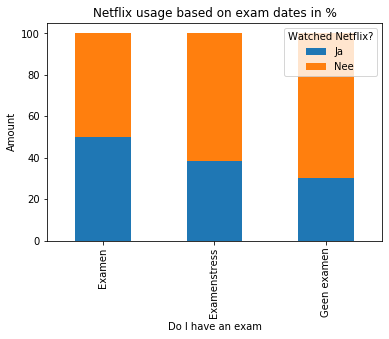

In [33]:
# Create a crosstab
ct = pd.crosstab(complete_dataframe['Tentamens'], complete_dataframe['Netflix gekeken?']).apply(lambda r: r/r.sum()*100, axis=1)

# Create a bar plot
ct.plot.bar(stacked=True)
plt.title("Netflix usage based on exam dates in %")
plt.legend(title='Watched Netflix?')
plt.ylabel('Amount')
plt.xlabel('Do I have an exam')
plt.show()

In the graph above, you can see if my Netflix usage is based on my exam period. In this case, there is almost no difference. However, it seems that my Netflix usage increases a little bit once the exams are upcoming. 

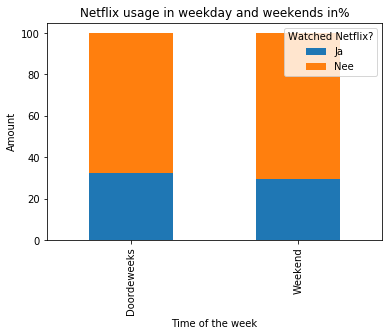

In [34]:
# Create a crosstab
ct = pd.crosstab(complete_dataframe['Weekend of Doordeweeks'], complete_dataframe['Netflix gekeken?']).apply(lambda r: r/r.sum()*100, axis=1)

# Create a bar plot
ct.plot.bar(stacked=True)
plt.title("Netflix usage in weekday and weekends in%")
plt.legend(title='Watched Netflix?')
plt.ylabel('Amount')
plt.xlabel('Time of the week')

plt.show()

In the graph above, you can see if my Netflix usage is based on a weekday or weekend. In this case, there is almost no difference. However, it seems that I watch a bit more Netflix during weekdays than during the weekend. 

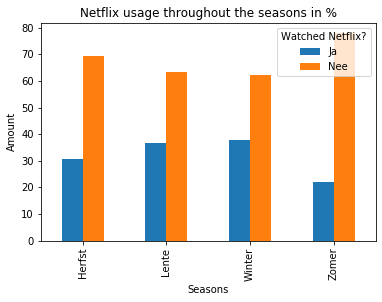

In [35]:
# Create a crosstab
ct = pd.crosstab(complete_dataframe['Seizoen'], complete_dataframe['Netflix gekeken?']).apply(lambda r: r/r.sum()*100, axis=1)

# Create a bar plot
ct.plot.bar(stacked=False)
plt.title("Netflix usage throughout the seasons in %")
plt.legend(title='Watched Netflix?')
plt.ylabel('Amount')
plt.xlabel('Seasons')

plt.show()

In the graph above, you can see if my Netflix usage is based on the seasons. In this case, the biggest difference is between the summer and the winter. In the summer, it is most likely that I watch less Netflix. In the winter, I watch more Netflix than in other seasons. 

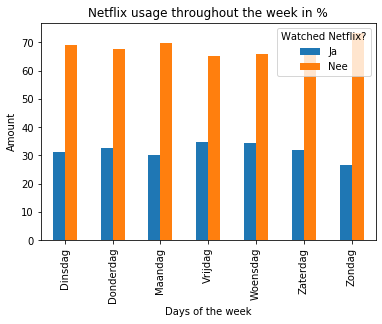

In [36]:
# Create a crosstab
ct = pd.crosstab(complete_dataframe['Dag van de week'], complete_dataframe['Netflix gekeken?']).apply(lambda r: r/r.sum()*100, axis=1)

# Create a bar plot
ct.plot.bar(stacked=False)
plt.title("Netflix usage throughout the week in %")
plt.legend(title='Watched Netflix?')
plt.ylabel('Amount')
plt.xlabel('Days of the week')

plt.show()

In the graph above, you can see if my Netflix usage is based on the days of the week. In this case, there is a really small difference between the bars. However, it seems I watch more Netflix on Friday, but this value is very close to wednesday. Nevertheless, both of those days could be classified as a weekday. It seems that the lowest value is on sunday. 

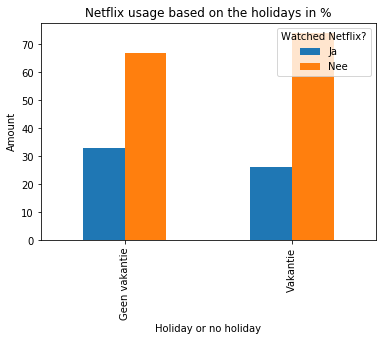

In [37]:
# Create a crosstab
ct = pd.crosstab(complete_dataframe['Vakanties'], complete_dataframe['Netflix gekeken?']).apply(lambda r: r/r.sum()*100, axis=1)

# Create a bar plot
ct.plot.bar(stacked=False)
plt.title("Netflix usage based on the holidays in %")
plt.legend(title='Watched Netflix?')
plt.ylabel('Amount')
plt.xlabel('Holiday or no holiday')

plt.show()

In the graph above, you can see if my Netflix usage is based on the holidays. In this case, there is a small difference between the bars. However, it seems I watch more Netflix when there is 'no holiday' and I watch less netflix when there is a 'holiday'. It might be possible that I use the holidays to go out with friends or actually 'doing' some activities, while outside the holidays, that is not possible, so in those periods I prefer to watch Netflix in my spare time. 

#### Qualitative vs Quantitative

Text(2.924999999999997, 0.5, 'Did I watch Netflix?')

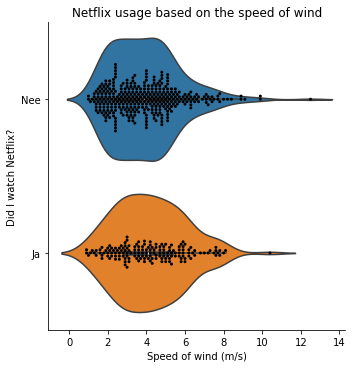

In [38]:
sns.catplot(x='Windsnelheid (m/s)', y='Netflix gekeken?', kind="violin", data=complete_dataframe)
sns.swarmplot(x='Windsnelheid (m/s)', y='Netflix gekeken?', size=3, color="k", data=complete_dataframe)
plt.title("Netflix usage based on the speed of wind")
plt.xlabel("Speed of wind (m/s)")
plt.ylabel("Did I watch Netflix?")

In the graph above, you can see if my Netflix usage is based on the speed of the wind. In this case, there is almost no difference between the variables. 

Text(0, 0.5, 'Did I watch Netflix?')

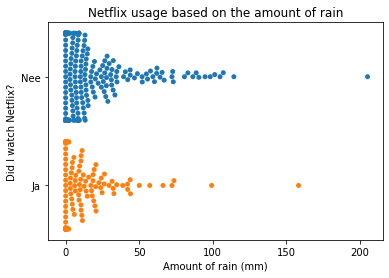

In [39]:
sns.swarmplot(x="Neerslag (mm)", y="Netflix gekeken?",data=complete_dataframe)
plt.title("Netflix usage based on the amount of rain")
plt.xlabel("Amount of rain (mm)")
plt.ylabel("Did I watch Netflix?")

In the graph above, you can see if my Netflix usage is based the amount of rain. In this case, there no real difference.

Text(0, 0.5, 'Did I watch Netflix?')

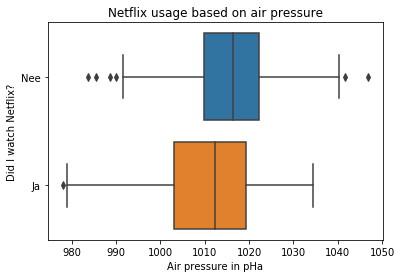

In [40]:
sns.boxplot(data = complete_dataframe, y="Netflix gekeken?",x="Luchtdruk")
plt.title("Netflix usage based on air pressure")
plt.xlabel("Air pressure in pHa")
plt.ylabel("Did I watch Netflix?")

In the graph above, you can see if my Netflix usage is based on the air pressure. In this case, it seems I watch more Netfix when the air pressure is low. 

Text(0, 0.5, 'Did I watch Netflix?')

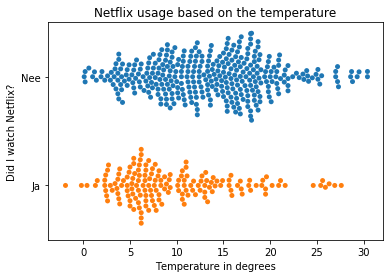

In [41]:
sns.swarmplot(x='Temperatuur (G)', y='Netflix gekeken?', data=complete_dataframe)
plt.title("Netflix usage based on the temperature")
plt.xlabel("Temperature in degrees")
plt.ylabel("Did I watch Netflix?")

In the graph above, you can see if my Netflix usage is based on the temperature. In this case, it seems that my Netflix usages decreases once the temperature becomes higher. 

Text(0, 0.5, 'Did I watch Netflix?')

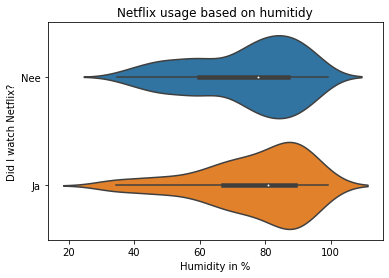

In [42]:
sns.violinplot(x='Relatieve vochtigheid (%)', y='Netflix gekeken?', data=complete_dataframe)
plt.title("Netflix usage based on humitidy")
plt.xlabel("Humidity in %")
plt.ylabel("Did I watch Netflix?")

In the graph above, you can see if my Netflix usage is based on the humidity. In this case, it seems like I watch more Netflix when the humidity is higher and my Netflix usage decreases when the humidity is lower. However, it is not a very strong difference

### Creating a correlation matrix 

In the previous section, I already saw a few correlations. In order to get an overview of all the correlations between variables, a correlation matrix is useful. A correlation matrix displays values between -1 and 1. 

In this case, I selected the highest variables of the row 'Ja'.  
However, the first correlation matrix has too much variables in order to clearly see the correlations. Therefore, we first selected a few variables to decrease the amount of variables in the correlation matrix. 

In [43]:
# Creating the correlation matrix
corr = complete_dataframe[['Windsnelheid (m/s)', 'Luchtdruk', 'Relatieve vochtigheid (%)', 'Temperatuur (G)', 'Neerslag (mm)', 'Herfst', 'Lente', 'Winter', 'Zomer', 'Doordeweeks', 'Weekend', 'Ja', 'Nee', 'Dinsdag', 'Maandag', 'Woensdag', 'Donderdag', 'Vrijdag', 'Zaterdag', 'Zondag', 'Examen', 'Examenstress', 'Geen examen', 'Geen vakantie', 'Vakantie']].corr()
corr

,Windsnelheid (m/s),Luchtdruk,Relatieve vochtigheid (%),Temperatuur (G),Neerslag (mm),Herfst,Lente,Winter,Zomer,Doordeweeks,...,Woensdag,Donderdag,Vrijdag,Zaterdag,Zondag,Examen,Examenstress,Geen examen,Geen vakantie,Vakantie
Windsnelheid (m/s),1.000000,-0.343217,-0.017550,-0.093400,0.292069,-0.122561,0.042384,0.222771,-0.130049,-0.105905,...,-0.048821,-0.042992,-0.005902,0.056458,0.080601,-0.017035,0.113258,-0.101803,0.024394,-0.024394
Luchtdruk,-0.343217,1.000000,-0.301691,0.062242,-0.346750,-0.056231,0.206103,-0.124465,0.005002,0.043468,...,0.043478,0.004754,-0.023757,-0.012341,-0.043978,0.053699,-0.014159,-0.005573,0.090515,-0.090515
Relatieve vochtigheid (%),-0.017550,-0.301691,1.000000,-0.595459,0.309719,0.299123,-0.479201,0.400460,-0.320740,0.021216,...,0.017821,0.023177,-0.015506,-0.033435,0.006107,-0.015673,-0.068795,0.071071,-0.030951,0.030951
Temperatuur (G),-0.093400,0.062242,-0.595459,1.000000,-0.058412,-0.052494,-0.015962,-0.565620,0.663906,-0.011988,...,0.002281,0.002242,-0.005517,0.016163,-0.000706,-0.006678,-0.008935,0.010878,-0.101364,0.101364
Neerslag (mm),0.292069,-0.346750,0.309719,-0.058412,1.000000,0.064737,-0.112180,0.061602,-0.035539,-0.014467,...,-0.022702,0.056093,-0.059080,-0.075388,0.094599,0.025779,-0.037122,0.026201,-0.039086,0.039086
Herfst,-0.122561,-0.056231,0.299123,-0.052494,0.064737,1.000000,-0.341337,-0.424658,-0.393424,0.002644,...,0.003851,-0.000275,-0.003781,-0.003781,0.000373,-0.026906,-0.281796,0.277884,0.270973,-0.270973
Lente,0.042384,0.206103,-0.479201,-0.015962,-0.112180,-0.341337,1.000000,-0.267230,-0.247574,-0.008193,...,0.001357,-0.001234,0.003977,0.003977,0.006629,-0.058565,0.023250,-0.001357,0.125482,-0.125482
Winter,0.222771,-0.124465,0.400460,-0.565620,0.061602,-0.424658,-0.267230,1.000000,-0.308008,-0.003235,...,-0.002774,-0.005972,0.000461,0.000461,0.003733,0.073148,0.282697,-0.295151,-0.160536,0.160536
Zomer,-0.130049,0.005002,-0.320740,0.663906,-0.035539,-0.393424,-0.247574,-0.308008,1.000000,0.007852,...,-0.002782,0.007667,0.000213,0.000213,-0.010401,0.008512,0.008070,-0.010705,-0.259369,0.259369
Doordeweeks,-0.105905,0.043468,0.021216,-0.011988,-0.014467,0.002644,-0.008193,-0.003235,0.007852,1.000000,...,0.255768,0.257809,0.253719,-0.649379,-0.644117,0.078987,-0.022771,-0.006346,0.086974,-0.086974


In [44]:
# Creating the correlation matrix
corr_1 = complete_dataframe[['Windsnelheid (m/s)', 'Relatieve vochtigheid (%)', 'Lente', 'Winter', 'Doordeweeks', 'Weekend','Ja', 'Nee', 'Dinsdag', 'Maandag', 'Woensdag', 'Donderdag', 'Vrijdag', 'Zaterdag', 'Examen', 'Examenstress', 'Geen vakantie']].corr()
corr_1

,Windsnelheid (m/s),Relatieve vochtigheid (%),Lente,Winter,Doordeweeks,Weekend,Ja,Nee,Dinsdag,Maandag,Woensdag,Donderdag,Vrijdag,Zaterdag,Examen,Examenstress,Geen vakantie
Windsnelheid (m/s),1.000000,-0.017550,0.042384,0.222771,-0.105905,0.105905,0.066026,-0.066026,-0.026488,-0.011243,-0.048821,-0.042992,-0.005902,0.056458,-0.017035,0.113258,0.024394
Relatieve vochtigheid (%),-0.017550,1.000000,-0.479201,0.400460,0.021216,-0.021216,0.067169,-0.067169,0.013341,-0.011922,0.017821,0.023177,-0.015506,-0.033435,-0.015673,-0.068795,-0.030951
Lente,0.042384,-0.479201,1.000000,-0.267230,-0.008193,0.008193,0.050190,-0.050190,-0.001234,-0.013335,0.001357,-0.001234,0.003977,0.003977,-0.058565,0.023250,0.125482
Winter,0.222771,0.400460,-0.267230,1.000000,-0.003235,0.003235,0.076435,-0.076435,0.006908,-0.002774,-0.002774,-0.005972,0.000461,0.000461,0.073148,0.282697,-0.160536
Doordeweeks,-0.105905,0.021216,-0.008193,-0.003235,1.000000,-1.000000,0.030378,-0.030378,0.257809,0.255768,0.255768,0.257809,0.253719,-0.649379,0.078987,-0.022771,0.086974
Weekend,0.105905,-0.021216,0.008193,0.003235,-1.000000,1.000000,-0.030378,0.030378,-0.257809,-0.255768,-0.255768,-0.257809,-0.253719,0.649379,-0.078987,0.022771,-0.086974
Ja,0.066026,0.067169,0.050190,0.076435,0.030378,-0.030378,1.000000,-1.000000,-0.004874,-0.013143,0.023018,0.007111,0.026985,0.002739,0.049915,0.056203,0.059870
Nee,-0.066026,-0.067169,-0.050190,-0.076435,-0.030378,0.030378,-1.000000,1.000000,0.004874,0.013143,-0.023018,-0.007111,-0.026985,-0.002739,-0.049915,-0.056203,-0.059870
Dinsdag,-0.026488,0.013341,-0.001234,0.006908,0.257809,-0.257809,-0.004874,0.004874,1.000000,-0.168768,-0.168768,-0.170115,-0.167416,-0.167416,0.037505,-0.007513,0.021579
Maandag,-0.011243,-0.011922,-0.013335,-0.002774,0.255768,-0.255768,-0.013143,0.013143,-0.168768,1.000000,-0.167431,-0.168768,-0.166090,-0.166090,0.038426,-0.005411,0.033038


According to the correlation matrix, the highest correlations seem with the variables <br>
However, these are 'weak positive correlation' which is between 0 < r < 0.4

- Windsnelheid (m/s) (fastness of wind) - 0.066026 - Weak positive correlation 
- Relatieve vochtigheid (%) (relative humidity) - 0.067169 - Weak positive correlation
- Winter (winter) - 0.076435 - Weak positive correlation
- Doordeweeks (weekdays) - 0.030378 - Weak positive correlation
- Vrijdag (friday) - 0.026985 - Weak positive correlation
- Examenstress (examstress) - 0.056203 - Weak positive correlation
- Geen vakantie (no holiday) - 0.059870 - Weak positive correlation

The heathmap is a visual way of showing the correlations between variables. 

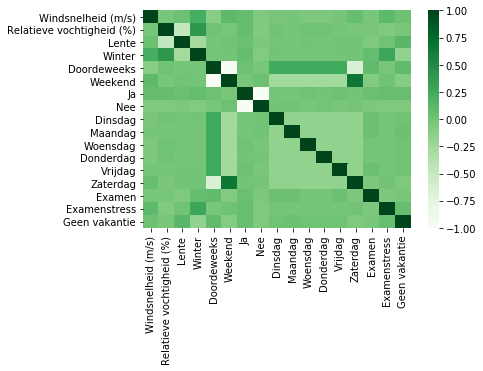

In [45]:
sns.heatmap(corr_1, xticklabels=corr_1.columns, yticklabels=corr_1.columns, cmap="Greens")
plt.show()

According to the correlation matrix and the heatmap, the variables which I am going to use are:<br>
- Y-variable = 'Ja'<br>
- X-variabele = 'Windsnelheid (m/s)', 'Relatieve vochtigheid (%)', 'Winter', 'Doordeweeks', 'Vrijdag', 'Examenstress' en 'Geen vakantie'<br>

## Predictive model

In this case, we will use the Y-variable 'Watched Netflix'. I am going to train a machine learning algorithm. The algorithm will be the KNN-model and the Random Forest model. I chose to use supervised learning and especifically based on classification (because I am going to predict a qualitative variable). I am not going to use linear regression, because I don't have the right type of variables for lineair regression.

In [46]:
complete_dataframe['Netflix gekeken?'].value_counts()

Nee    348
Ja     161
Name: Netflix gekeken?, dtype: int64

There are a lot more 'not watching Netflix' cases than 'watching Netflix' cases. So the difficulty will be in detecting 'watching Netflix', not in 'not watching Netflix'.

### KNN-Model 

Let's train the KNN (K-Nearest Neighbor). With this algorithm, you use the values of your 'neigbors' to predict the outcome. In this case, k is the number of neighbors. First, we will split our model into a training and test set. 

In [47]:
# Train the model
X = complete_dataframe[['Windsnelheid (m/s)', 'Relatieve vochtigheid (%)', 'Winter', 'Geen vakantie', 'Examenstress', 'Doordeweeks', 'Vrijdag']] 
y = complete_dataframe['Ja'] 

# Normalize the variables in order to calculate everything on the same scale
X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [60]:
# Evaluate the best k for the model
for i in range(3,20):
    knn_new = KNeighborsClassifier(n_neighbors=i) 
    knn_new = knn_new.fit(X_train, y_train) 
    y_test_pred_new = knn_new.predict(X_test)
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new))
    

With 3 neighbors the result is:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       106
           1       0.24      0.17      0.20        47

    accuracy                           0.58       153
   macro avg       0.46      0.47      0.46       153
weighted avg       0.54      0.58      0.56       153

With 4 neighbors the result is:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       106
           1       0.27      0.09      0.13        47

    accuracy                           0.65       153
   macro avg       0.48      0.49      0.45       153
weighted avg       0.56      0.65      0.58       153

With 5 neighbors the result is:
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       106
           1       0.29      0.15      0.20        47

    accuracy                           0.63       153
   macro avg       0.49      0.4

In all cases, it is more likely to predict if I don't watch Netflix on a certain day instead of if I will watch Netflix on a certain day. 

In general, accuracy is the fraction of predictions the model got right. The accuracy varies between 0.60 and 0.68 in the cases. 

- Precision: What proportion of positive identifications was actually correct? If I watch Netflix, how many of those are correct?<br>
$precision = \frac{TruePositives}{TruePositives + FalsePositives} = Percentage$


- Recall: Of the days that are predicted as 'I don't watch Netflix', how many of them did I actually did not watch Netflix? In this case, it is 0.96, which good. <br>
$recall = \frac{TruePositives}{TruePositives + FalseNegatives} = Percentage$

In this case, I chose to use <i>k = 17</i> since this one has the best values for accuracy, precision and recall. 

In [49]:
# Calculating the knn-score (also accuracy)
knn = KNeighborsClassifier(n_neighbors=17) 
knn = knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6797385620915033

The accuracy is 0.68, that's pretty good. Let's evaluate the model using our standard approach for a classification problem: making a confusion matrix and calculating accuracy, precision and recall.

In [50]:
# Creating a confusion matrix
y_test_pred = knn.predict(X_test) 
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[102,   4],
       [ 45,   2]])

The confusion matrix has a row with 102 and 4. Based on the value_counts(), the value of 'not watching Netflix' was  higher. Therefore, the confusion matrix starts with 'No'. 

In [51]:
# Displays the confusion matrix
conf_matrix = pd.DataFrame(cm, index=['Nee (Actual)', 'Ja (Actual)'], columns = ['Nee (Predicted)', 'Ja (Predicted)']) 
conf_matrix

,Nee (Predicted),Ja (Predicted)
Nee (Actual),102,4
Ja (Actual),45,2


In [57]:
 print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.96      0.81       106
           1       0.33      0.04      0.08        47

    accuracy                           0.68       153
   macro avg       0.51      0.50      0.44       153
weighted avg       0.58      0.68      0.58       153



$Recall = \frac{102}{102 + 4} = .96$
<br><br>
$Precision = \frac{102}{102 + 45} = .69$
<br><br>

As you can see in the confusion matrix, 'Not watching Netflix' is predicted reasonably well.

### Random Forest

Let's train the Random Forest algorithm. This is an extension of the decision tree. <i>n-estimators is the amount of trees of this model</i>. 

In [52]:
# Train the model
X_1 = complete_dataframe[['Windsnelheid (m/s)', 'Relatieve vochtigheid (%)', 'Winter', 'Geen vakantie', 'Examenstress', 'Doordeweeks', 'Vrijdag']] #create the X matrix
y_1 = complete_dataframe['Ja'] 
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=1)

In [53]:
rf = RandomForestClassifier(random_state=1, n_estimators=150) #RF is a random algorithm, so to get the same results we need to use random_state
rf = rf.fit(X_train_1, y_train_1)

Let's evaluate the model using our standard approach for a classification problem: making a confusion matrix and calculating accuracy, precision and recall.

In [54]:
y_pred_1 = rf.predict(X_test_1) #the predicted values
cm = confusion_matrix(y_test_1, y_pred_1) #creates a "confusion matrix"
cm

array([[93, 13],
       [38,  9]])

In [55]:
cm = pd.DataFrame(cm, index=['Nee (Actual)', 'Ja (Actual)'], columns = ['Nee (Predicted)', 'Ja (Predicted)']) #label and make df
cm

,Nee (Predicted),Ja (Predicted)
Nee (Actual),93,13
Ja (Actual),38,9


In [56]:
print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.71      0.88      0.78       106
           1       0.41      0.19      0.26        47

    accuracy                           0.67       153
   macro avg       0.56      0.53      0.52       153
weighted avg       0.62      0.67      0.62       153



$Recall = \frac{93}{93 + 13} = .88$
<br><br>
$Precision = \frac{93}{93 + 38} = .71$
<br><br>

In order to compare systems (or models) based on precision and recall, it is possible to calculate the F-beta score (Hartman, 2018). The highest score would give the best prediction. 

<br>In this case, I take the standard F-beta score, which is 0.5
<br>
$F-beta = \frac{1}{Beta x 1/precision + (1-Beta) x 1/recall} = Percentage$

Random forest model has a F-beta score: $0.78$<br>
KNN model has a F-beta score: $0.80$<br>

So it seems that KNN-model could be used as model for the prediction

# Results

In order to answer the research question, I would use the knn-model with k = 17. 

Based on the research question:

<i>Does the weather and time have an influence on my Netflix usage?</i>

No, it doesn't have an influence on the weather. In general, all my variables have a positive weak correlation with the Netflix variable, which means that there is a bit of a correlation, but there is no strong evidence. However, I tried to add some extra variables, because I thought those variables would have an influence on my Netflix usage. However, the extra variables show how I actually procrastinate at the times I need to study. 


# References

Hartman, E. M. (2018, 6 december). Lakmoesproef in de AI-hype: recall en precision. Alles over informatiemanagement.nl. https://allesoverinformatiemanagement.nl/2018/12/06/lakmoesproef-in-de-ai-hype-recall-en-precision/